In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coil2 = pd.read_csv("Dados - coil 2.csv", header=0)
coil2.head()

,freq (MHz),2I_0 (A),I_0 (A),B_0 (mT),coil
0,24.9,0.44,0.220,0.904314,30-75
1,30.0,0.52,0.260,1.068735,30-75
2,35.1,0.61,0.305,1.253709,30-75
3,40.0,0.71,0.355,1.459235,30-75
4,45.0,0.80,0.400,1.644208,30-75


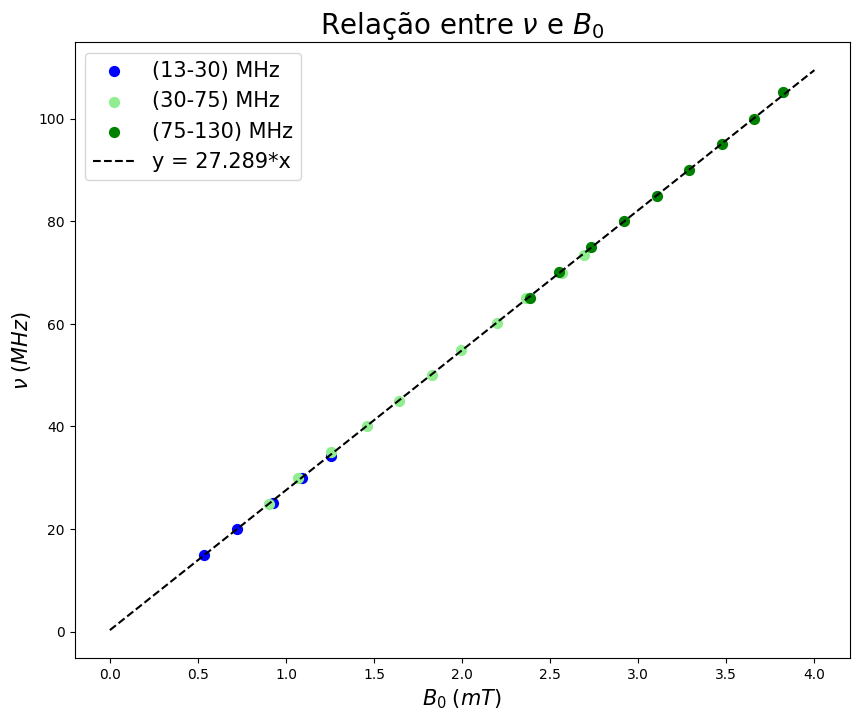

In [3]:
from sklearn.linear_model import LinearRegression

coil_13_30 = coil2[coil2["coil"] == "13-30"]
coil_30_75 = coil2[coil2["coil"] == "30-75"]
coil_75_130 = coil2[coil2["coil"] == "75-130"]

ln = LinearRegression()
model_ln = ln.fit(np.array(coil2["B_0 (mT)"]).reshape(-1,1), np.array(coil2["freq (MHz)"]))

x = np.arange(0, 5, 1)
y = model_ln.predict(np.array(x).reshape(-1,1))
a = np.round(model_ln.coef_, 3)
b = np.round(model_ln.singular_, 3)

plt.figure(figsize=(10,8))
plt.scatter(data=coil_13_30, x="B_0 (mT)", y="freq (MHz)", s=50, c="blue", label="(13-30) MHz")
plt.scatter(data=coil_30_75, x="B_0 (mT)", y="freq (MHz)",s=50, c="lightgreen", label="(30-75) MHz")
plt.scatter(data=coil_75_130, x="B_0 (mT)", y="freq (MHz)",s=50, c="green", label="(75-130) MHz")
plt.plot(x, y, linestyle="--", c="black", label=f"y = {a[0]}*x")
plt.xlabel(r"$B_0 \; (mT)$", fontsize=15)
plt.ylabel(r"$\nu \; (MHz)$", fontsize=15)
plt.title(r"Relação entre $\nu$ e $B_0$", fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [4]:
hall = pd.read_csv("sonda_hall.csv", header=0)
hall.head()

,freq,2I,I,B(mT),B(hall),B(hall)(mT)
0,25.0,0.43,0.215,0.88365,8.10,0.810
1,30.0,0.53,0.265,1.08915,9.91,0.991
2,35.0,0.61,0.305,1.25355,11.40,1.140
3,39.9,0.71,0.355,1.45905,13.20,1.320
4,45.1,0.80,0.400,1.64400,14.70,1.470


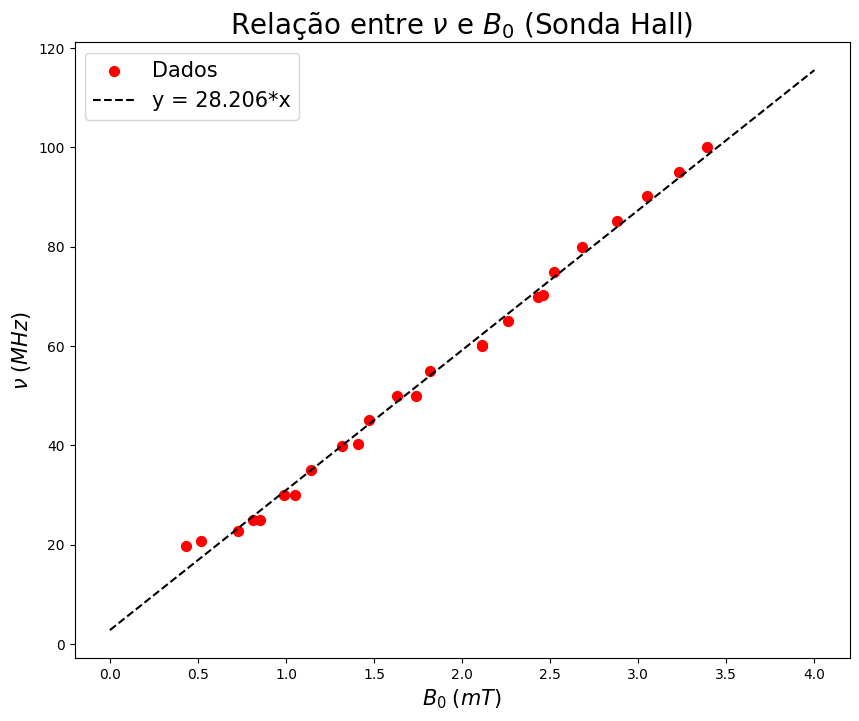

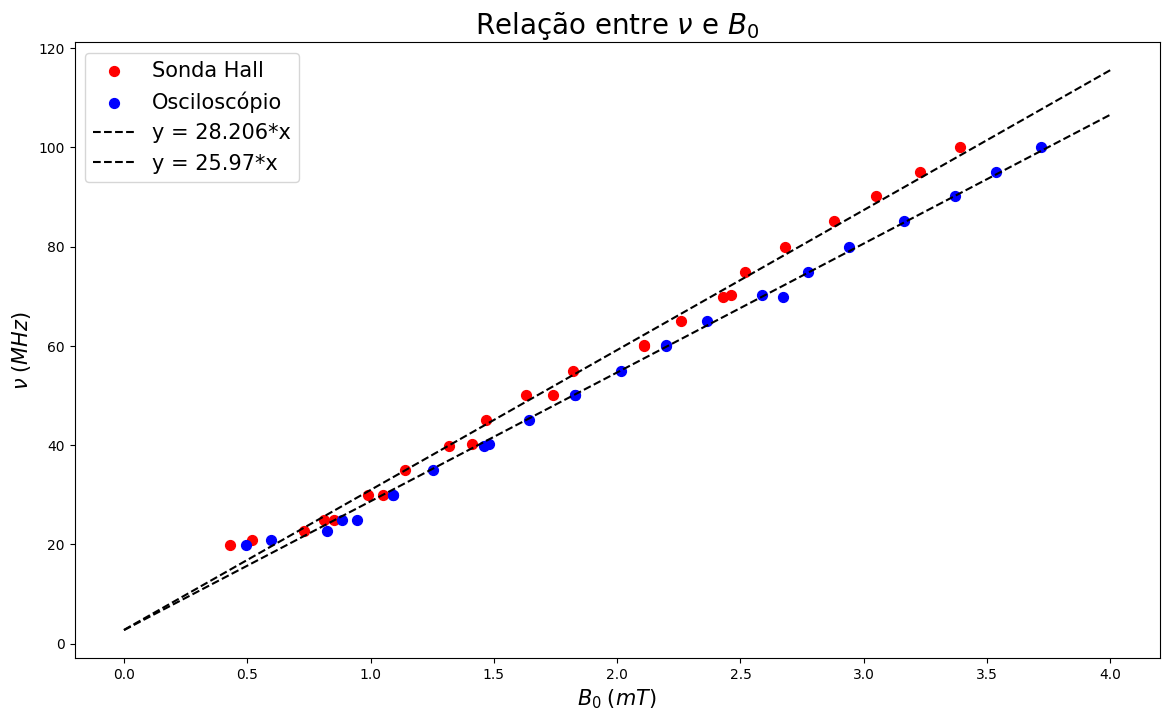

In [21]:

ln = LinearRegression()
model_ln_hall = ln.fit(np.array(hall["B(hall)(mT)"]).reshape(-1,1), np.array(hall["freq"]))

x = np.arange(0, 5, 1)
y_hall = model_ln_hall.predict(np.array(x).reshape(-1,1))
a_hall = np.round(model_ln_hall.coef_, 3)
b_hall = np.round(model_ln_hall.singular_, 3)

model_ln_2 = ln.fit(np.array(hall["B(mT)"]).reshape(-1,1), np.array(hall["freq"]))

y = model_ln_2.predict(np.array(x).reshape(-1,1))
a = np.round(model_ln_2.coef_, 3)
b = np.round(model_ln_2.singular_, 3)

plt.figure(figsize=(10,8))
plt.scatter(data=hall, x="B(hall)(mT)", y="freq",s=50, c="red", label="Dados")
plt.plot(x, y_hall, linestyle="--", c="black", label=f"y = {a_hall[0]}*x")
plt.xlabel(r"$B_0 \; (mT)$", fontsize=15)
plt.ylabel(r"$\nu \; (MHz)$", fontsize=15)
plt.title(r"Relação entre $\nu$ e $B_0$ (Sonda Hall)", fontsize=20)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(14,8))
plt.scatter(data=hall, x="B(hall)(mT)", y="freq",s=50, c="red", label="Sonda Hall")
plt.scatter(data=hall, x="B(mT)", y="freq",s=50, c="blue", label="Osciloscópio")
plt.plot(x, y_hall, linestyle="--", c="black", label=f"y = {a_hall[0]}*x")
plt.plot(x, y, linestyle="--", c="black", label=f"y = {a[0]}*x")
plt.xlabel(r"$B_0 \; (mT)$", fontsize=15)
plt.ylabel(r"$\nu \; (MHz)$", fontsize=15)
plt.title(r"Relação entre $\nu$ e $B_0$", fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [6]:
c2_0 = pd.read_csv("circuito_2_0.csv", header=0)
c2_3_6 = pd.read_csv("circuito_2_(3_6).csv", header=0)
c2_1_6 = pd.read_csv("circuito_2_(1_6).csv", header=0)
c2_2_6 = pd.read_csv("circuito_2_(2_6).csv", header=0)
c2_4_6 = pd.read_csv("circuito_2_(4_6).csv", header=0)
c2_4_6.head()


,freq(MHz)_4/6,U2(V)_4/6,I1 (uA)_4/6,U1 (V)_4/6
0,20.5,0.62,51.25,2.87000
1,20.7,0.66,51.38,2.87728
2,20.9,0.72,51.63,2.89128
3,21.1,0.76,51.55,2.88680
4,21.3,0.86,51.22,2.86832


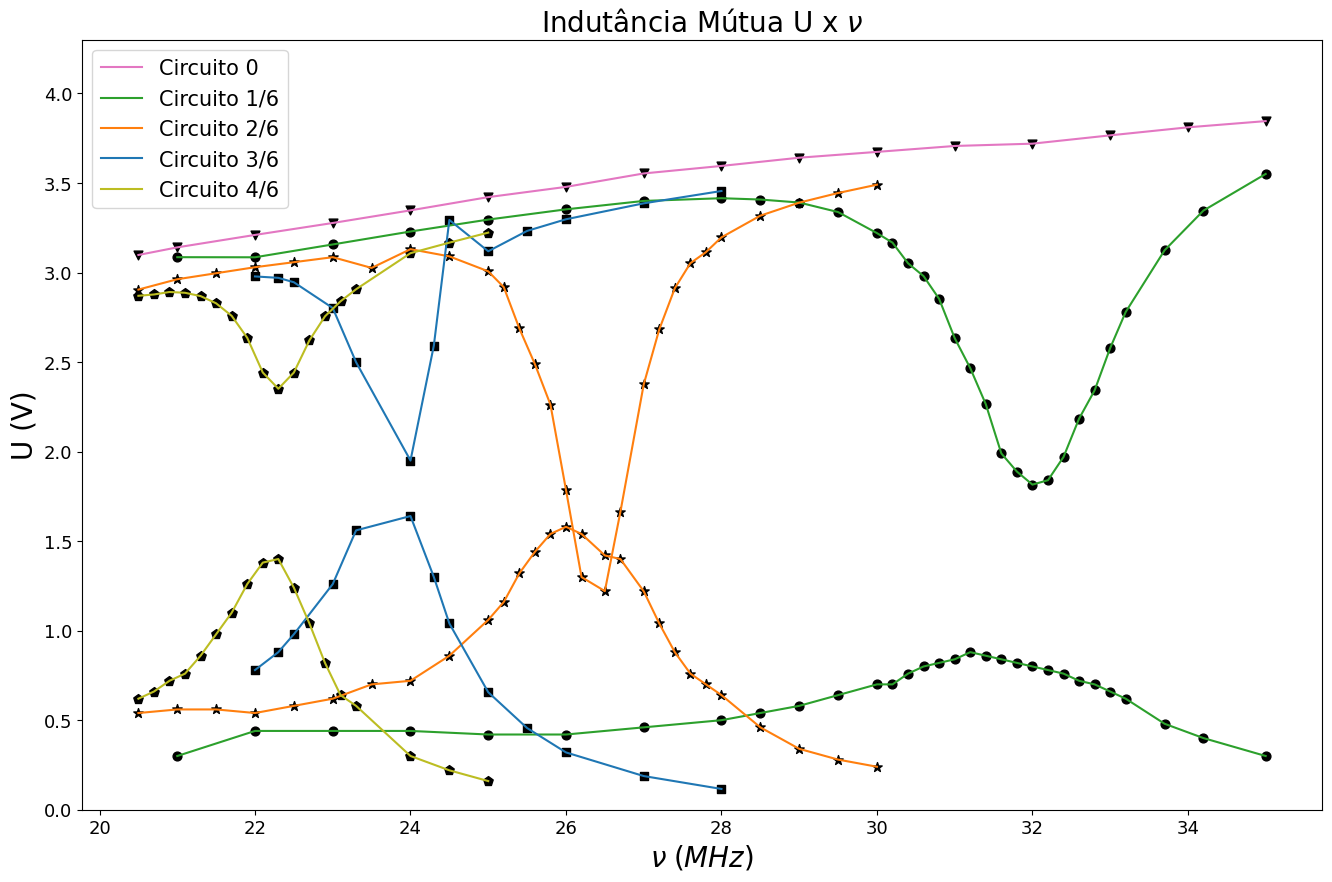

In [7]:
plt.figure(figsize=(16,10))
#Gráfico sem indutância
plt.plot(c2_0["freq(MHz)"],c2_0["U1 (V)"], linestyle="-", linewidth=1.5, label=r"Circuito 0", c="tab:pink")
plt.scatter(data=c2_0, x="freq(MHz)", y="U1 (V)", s=40, marker='v', c="black",label=None)
#Indutância para C=1/6
plt.scatter(data=c2_1_6, x="freq(MHz)_1/6", y="U1 (V)_1/6", s=40, c="black",label=None)
plt.scatter(data=c2_1_6, x="freq(MHz)_1/6", y="U2(V)_1/6", s=40, c="black", label=None)
plt.plot(c2_1_6["freq(MHz)_1/6"],c2_1_6["U2(V)_1/6"], linestyle="-", linewidth=1.5, c="tab:green",label=None)
plt.plot(c2_1_6["freq(MHz)_1/6"],c2_1_6["U1 (V)_1/6"], linestyle="-", linewidth=1.5, c="tab:green",label=r"Circuito 1/6")
# #Indutância para C=2/6
plt.scatter(data=c2_2_6, x="freq(MHz)_2/6", y="U1 (V)_2/6", s=50, marker="*", c="black",label=None)
plt.scatter(data=c2_2_6, x="freq(MHz)_2/6", y="U2(V)_2/6", s=50, marker="*", c="black", label=None)
plt.plot(c2_2_6["freq(MHz)_2/6"],c2_2_6["U2(V)_2/6"], linestyle="-", linewidth=1.5,c="tab:orange",label=None)
plt.plot(c2_2_6["freq(MHz)_2/6"],c2_2_6["U1 (V)_2/6"], linestyle="-", linewidth=1.5, c="tab:orange",label=r"Circuito 2/6")
# #Indutância para C=3/6
plt.scatter(data=c2_3_6, x="freq(MHz)_3/6", y="U1 (V)_3/6", s=30, marker="s", c="black",label=None)
plt.scatter(data=c2_3_6, x="freq(MHz)_3/6", y="U2 (V)_3/6", s=30, marker="s",c="black", label=None)
plt.plot(c2_3_6["freq(MHz)_3/6"],c2_3_6["U2 (V)_3/6"], linestyle="-", linewidth=1.5, c="tab:blue",label=None)
plt.plot(c2_3_6["freq(MHz)_3/6"],c2_3_6["U1 (V)_3/6"], linestyle="-", linewidth=1.5, c="tab:blue",label=r"Circuito 3/6")
# #Indutância para C=4/6
plt.scatter(data=c2_4_6, x="freq(MHz)_4/6", y="U1 (V)_4/6", s=50, c="black", marker="p",label=None)
plt.scatter(data=c2_4_6, x="freq(MHz)_4/6", y="U2(V)_4/6", s=50, c="black", marker="p",label=None)
plt.plot(c2_4_6["freq(MHz)_4/6"],c2_4_6["U2(V)_4/6"], linestyle="-", linewidth=1.5, label=None,c='tab:olive')
plt.plot(c2_4_6["freq(MHz)_4/6"],c2_4_6["U1 (V)_4/6"], linestyle="-", linewidth=1.5, label=r"Circuito 4/6", c="tab:olive")
plt.xlabel(r"$\nu \; (MHz)$", fontsize=20)
plt.ylabel("U (V)", fontsize=20)
plt.title(r"Indutância Mútua U x $\nu$", fontsize=20)
plt.ylim((0,4.3))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)
plt.show()

In [8]:
db = pd.read_csv("Dados - db.csv", header=0)
db_N = pd.read_csv("Dados - db_N.csv", header=0)

db_N.head()

,freq (MHz),dI,dB
0,45.0,0.127,0.522036
1,45.0,0.083,0.341173
2,44.8,0.090,0.369947
3,45.0,0.079,0.324731
4,50.0,0.123,0.505594


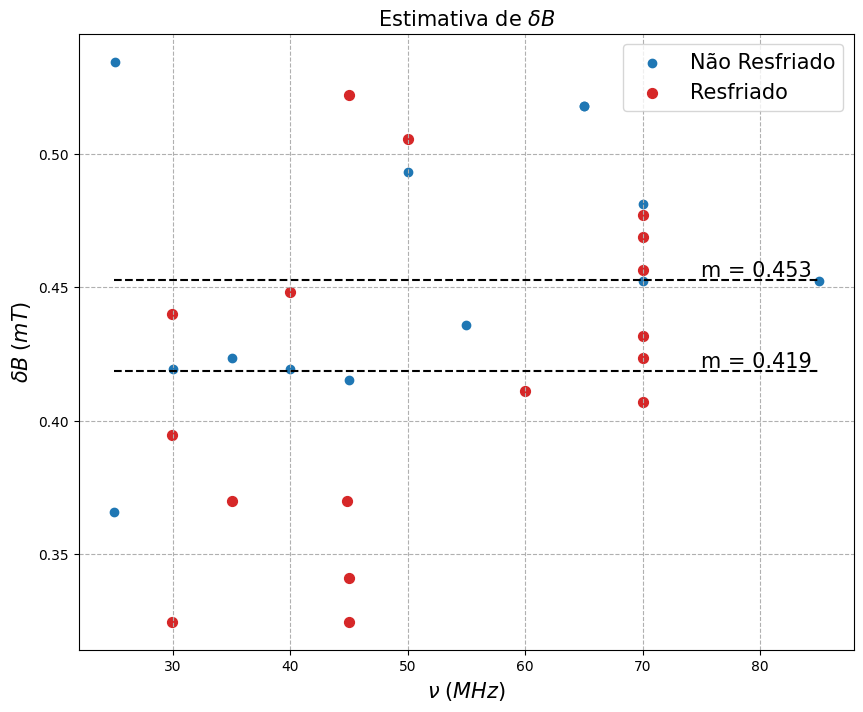

In [24]:

media_db = np.mean(db["dB"])
media_db_N = np.mean(db_N["dB"])
media_db_array = [media_db]*(db["dB"].shape[0])
media_db_N_array = [media_db_N]*(db_N["dB"].shape[0])


plt.figure(figsize=(10,8))
plt.grid(True, linestyle="--")
plt.scatter(data=db, x="freq (MHz)", y="dB", c="tab:blue", label="Não Resfriado")
plt.hlines(media_db, xmin=db["freq (MHz)"].min(), xmax=db["freq (MHz)"].max(), linestyle="--", colors="black")
plt.scatter(data=db_N, x= "freq (MHz)", y="dB", s=50, c="tab:red", label="Resfriado")
plt.hlines(media_db_N, xmin=db["freq (MHz)"].min(), xmax=db["freq (MHz)"].max(), linestyle="--", colors="black")
plt.legend(fontsize=15)
plt.title(r"Estimativa de $\delta B$", fontsize=15)
plt.xlabel(r"$\nu \; (MHz)$", fontsize=15)
plt.ylabel(r"$\delta B \; (mT)$", fontsize=15)
plt.text(75, 0.42,f"m = {media_db_N:.3f}", fontsize=15)
plt.text(75, 0.454,f"m = {media_db:.3f}", fontsize=15)
plt.show()

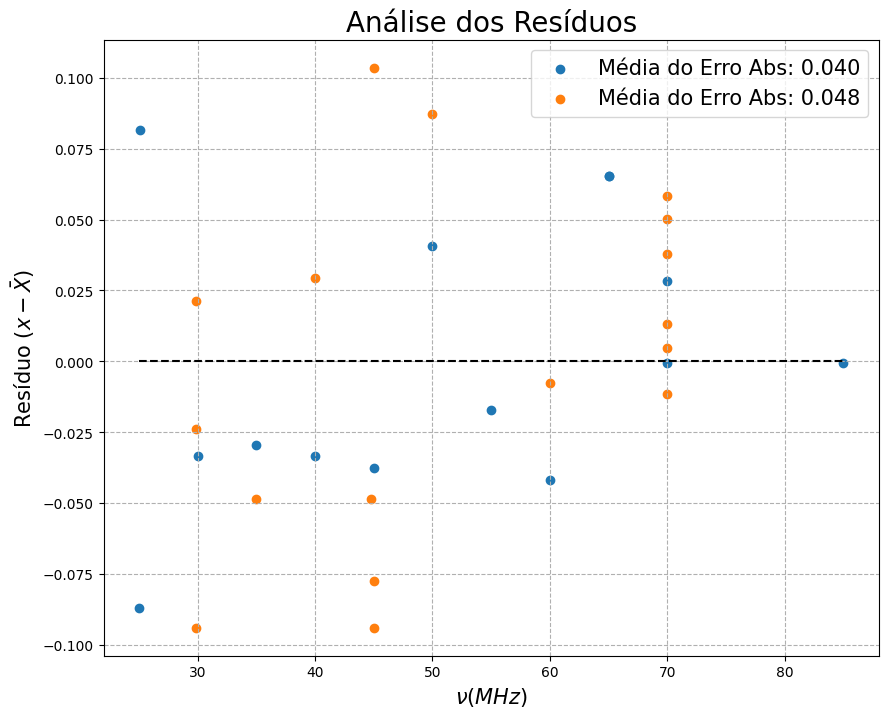

In [28]:
from sklearn.metrics import mean_absolute_error
erro = [db["dB"] - media_db]
erro_N = [db_N["dB"] - media_db_N]
media = np.mean(erro)
media_N = np.mean(erro_N)

erro_metrica = mean_absolute_error(media_db_array, db["dB"])
erro_metrica_N = mean_absolute_error(media_db_N_array, db_N["dB"])

plt.figure(figsize=(10,8))
plt.grid(True, linestyle="--")
plt.scatter(y=erro, x=db["freq (MHz)"], label=f"Média do Erro Abs: {erro_metrica:.3f}")
plt.scatter(x=db_N["freq (MHz)"], y=erro_N,label=f"Média do Erro Abs: {erro_metrica_N:.3f}")
plt.hlines(y=0, xmin=db["freq (MHz)"].min(), xmax=db["freq (MHz)"].max(), linestyle="--", colors="black")
plt.title("Análise dos Resíduos", fontsize=20)
plt.xlabel(r"$\nu (MHz)$", fontsize=15)
plt.ylabel(r"Resíduo ($x - \bar{X}$)", fontsize=15)
plt.legend(fontsize=15)
plt.show()



In [32]:
# Teste de Hipótese para as médias de dB
from scipy.stats import t
n1 = db.shape[0]
n2 = db_N.shape[0]

s1 = np.std(db["dB"])
s2 = np.std(db_N["dB"])

X1 = np.mean(db["dB"])
X2 = np.mean(db_N["dB"])

print("Dados Amostra 1:", n1, X1, s1)
print("Dados Amostra 2:", n2, X2, s2)

t_obs = (X1 - X2)/((s1**2/n1) + (s2**2/n2))**0.5

print("t observado:", t_obs)

p = (1 - t.cdf(t_obs, 13))
print("p_value",p)


Dados Amostra 1: 14 0.452745 0.04758018971769059
Dados Amostra 2: 17 0.4185476706705882 0.05749951297609919
t observado: 1.811978185035471
p_value 0.04657127560621932


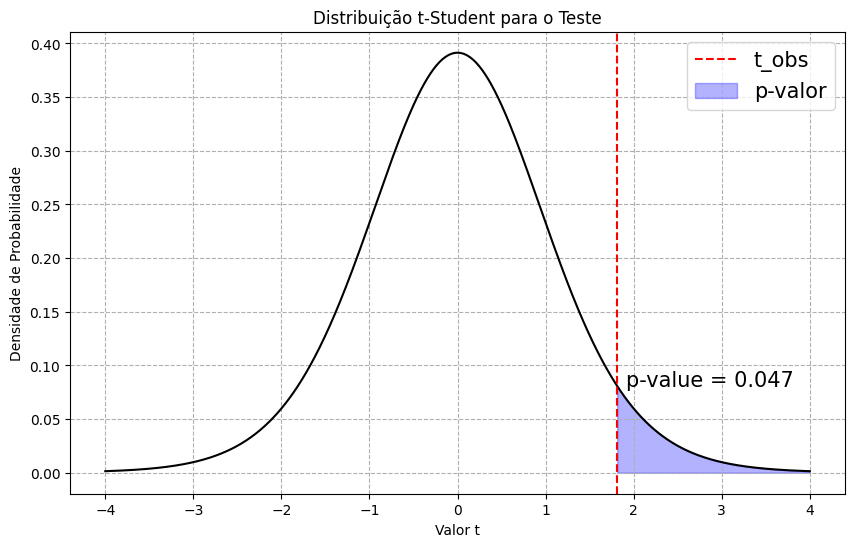

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


x = np.linspace(-4, 4, 1000)

# Calculando a distribuição t-Student
pdf = t.pdf(x, 13)

tobs = 1.812
p_value = 1 - t.cdf(tobs, 13)


plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'k-')
plt.axvline(tobs, color='red', linestyle='--', label='t_obs')
plt.fill_between(x[x > tobs], 0, pdf[x > tobs], color='blue', alpha=0.3, label='p-valor')
plt.text(tobs + 0.1, 0.08, f'p-value = {p_value:.3f}', fontsize=15)
plt.xlabel('Valor t')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição t-Student para o Teste')
plt.legend(fontsize=15)
plt.grid(True, linestyle="--")
plt.show()